I have an excel file showing Tetuan city power consumption, and I want to:
 
Parse the DateTime column, check frequency and consistency
Visualize trends in power consumption across zones
Compare with environmental features using scatter and line plots
Analyze lag effects and missing timestamps
Document top 3–5 insights

Step 1: Setup
First, we need to import the necessary Python libraries for data analysis and visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set_style("whitegrid")

Step 2: Load and Inspect the Data
Now, load the Tetuan City power consumption.csv file. Please make sure the CSV file is in the same directory as your notebook for this code to work correctly.

In [3]:
# Load the dataset
try:
    df = pd.read_csv('Tetuan City power consumption.csv')
    print("File loaded successfully!")
except FileNotFoundError:
    print("Error: 'Tetuan City power consumption.csv' not found.")
    print("Please make sure the file is in the same directory as your notebook.")

# Display the first few rows of the data
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()

File loaded successfully!

First 5 rows of the dataset:
        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0    

Step 3: Data Cleaning and Preparation
A crucial step is to prepare the data for analysis. We'll convert the DateTime column to a proper datetime format and check for any inconsistencies or missing data points.

In [4]:
# Convert 'DateTime' column to datetime objects
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Some column names have extra spaces. Let's fix them.
df.rename(columns={
    'Zone 2  Power Consumption': 'Zone 2 Power Consumption',
    'Zone 3  Power Consumption': 'Zone 3 Power Consumption'
}, inplace=True)


# Set 'DateTime' as the index for time series analysis
df.set_index('DateTime', inplace=True)

# Check the frequency of the data (the time between measurements)
time_diffs = df.index.to_series().diff().dropna()
print("\nTime Difference Analysis:")
print(time_diffs.describe())

# Check for missing timestamps, assuming a 10-minute frequency
# Resample the data to a 10-minute frequency and count any gaps
missing_timestamps = df.asfreq('10min').isnull().all(axis=1).sum()
print(f"\nNumber of missing 10-minute timestamps: {missing_timestamps}")


Time Difference Analysis:
count              52415
mean     0 days 00:10:00
std      0 days 00:00:00
min      0 days 00:10:00
25%      0 days 00:10:00
50%      0 days 00:10:00
75%      0 days 00:10:00
max      0 days 00:10:00
Name: DateTime, dtype: object

Number of missing 10-minute timestamps: 0


Step 4: Visualize Power Consumption Trends
Let's visualize the power consumption for the three different zones over the entire year. This will help us spot daily, weekly, and seasonal patterns.

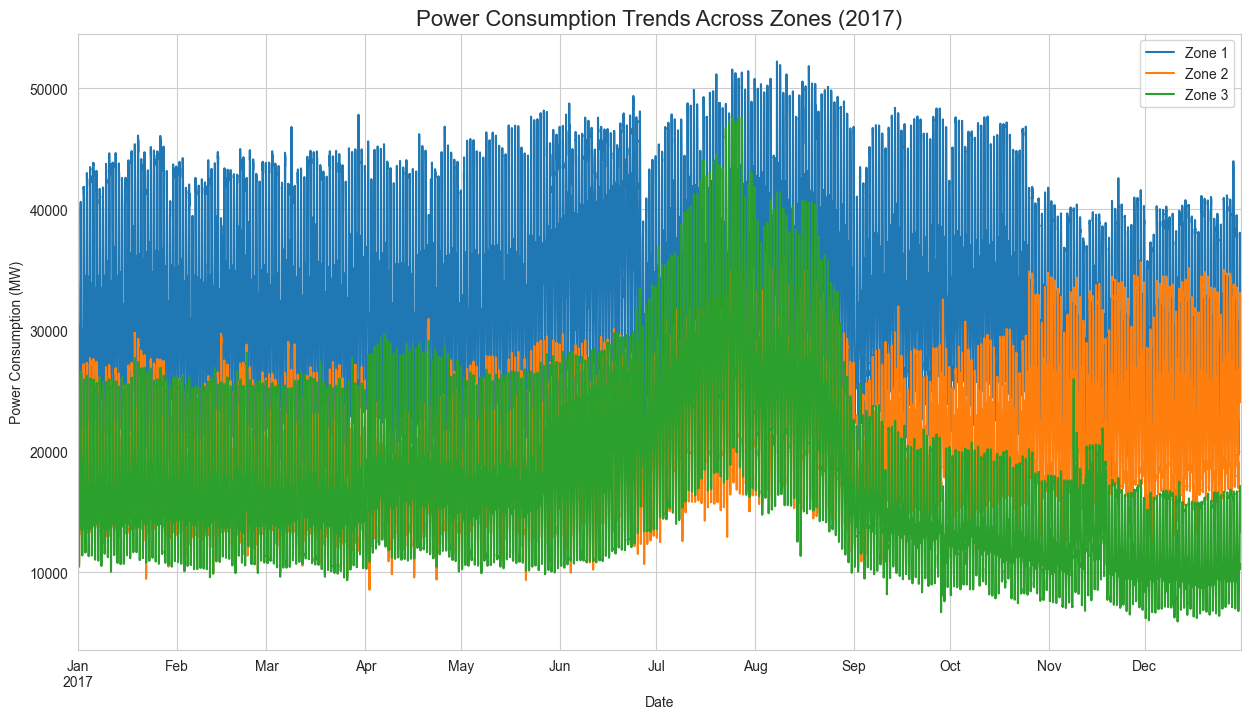

In [5]:
plt.figure(figsize=(15, 8))
df['Zone 1 Power Consumption'].plot(label='Zone 1')
df['Zone 2 Power Consumption'].plot(label='Zone 2')
df['Zone 3 Power Consumption'].plot(label='Zone 3')

plt.title('Power Consumption Trends Across Zones (2017)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Power Consumption (MW)')
plt.legend()
plt.show()

Step 5a: Relationship with Environmental Features
How do environmental factors like temperature and humidity affect power consumption? Scatter plots are a great way to visualize these relationships.

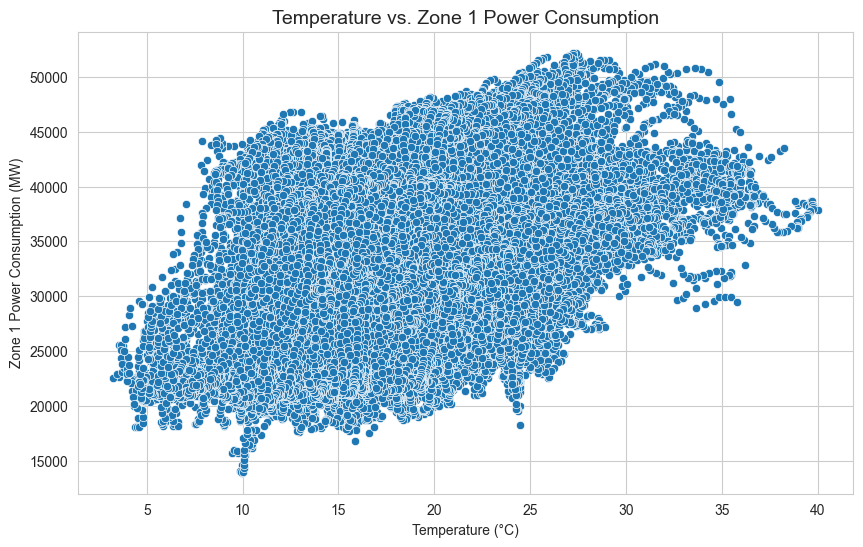

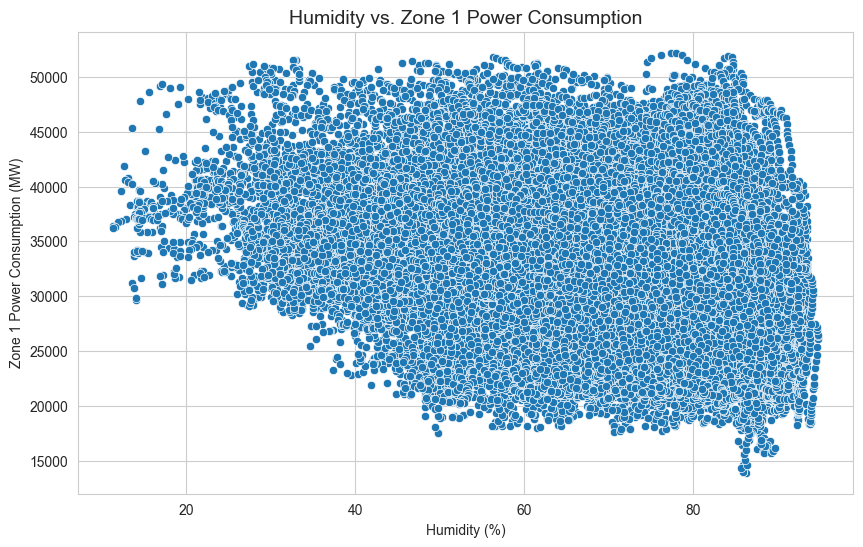

In [6]:
# Scatter plot of Temperature vs. Power Consumption for Zone 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Zone 1 Power Consumption')
plt.title('Temperature vs. Zone 1 Power Consumption', fontsize=14)
plt.xlabel('Temperature (°C)')
plt.ylabel('Zone 1 Power Consumption (MW)')
plt.show()

# Scatter plot of Humidity vs. Power Consumption for Zone 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Humidity', y='Zone 1 Power Consumption')
plt.title('Humidity vs. Zone 1 Power Consumption', fontsize=14)
plt.xlabel('Humidity (%)')
plt.ylabel('Zone 1 Power Consumption (MW)')
plt.show()

Step 5b: Plot temperature and power consumption on the same timeline to see how they track together.

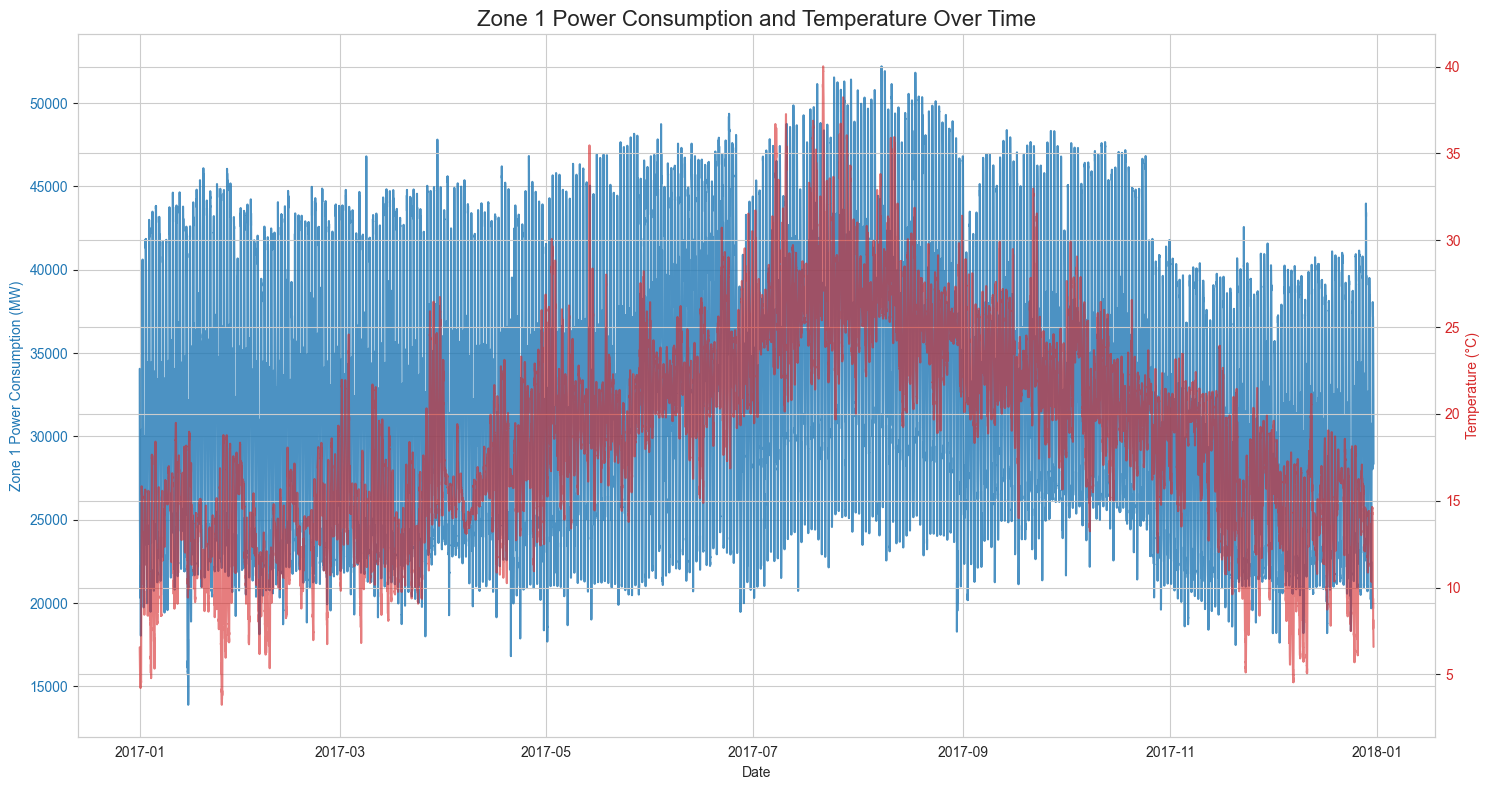

In [7]:
# Line plot of Power Consumption and Temperature over time
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Zone 1 Power Consumption (MW)', color='tab:blue')
ax1.plot(df.index, df['Zone 1 Power Consumption'], color='tab:blue', alpha=0.8)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.plot(df.index, df['Temperature'], color='tab:red', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Zone 1 Power Consumption and Temperature Over Time', fontsize=16)
fig.tight_layout()
plt.show()

Step 6: Analyze Lag Effects
Does a change in temperature have an immediate effect on power consumption, or is there a delay? We can investigate this by creating a "lagged" temperature feature and checking the correlation.


Correlation Matrix with Lagged Temperature:
                          Zone 1 Power Consumption  Temperature  \
Zone 1 Power Consumption                  1.000000     0.440221   
Temperature                               0.440221     1.000000   
Temperature_lag10min                      0.445045     0.999234   
Temperature_lag100min                     0.473785     0.968704   
Temperature_lag150min                     0.478122     0.939635   
Temperature_lag200min                     0.474430     0.905827   

                          Temperature_lag10min  Temperature_lag100min  \
Zone 1 Power Consumption              0.445045               0.473785   
Temperature                           0.999234               0.968704   
Temperature_lag10min                  1.000000               0.973685   
Temperature_lag100min                 0.973685               1.000000   
Temperature_lag150min                 0.945901               0.989952   
Temperature_lag200min                 0.912836 

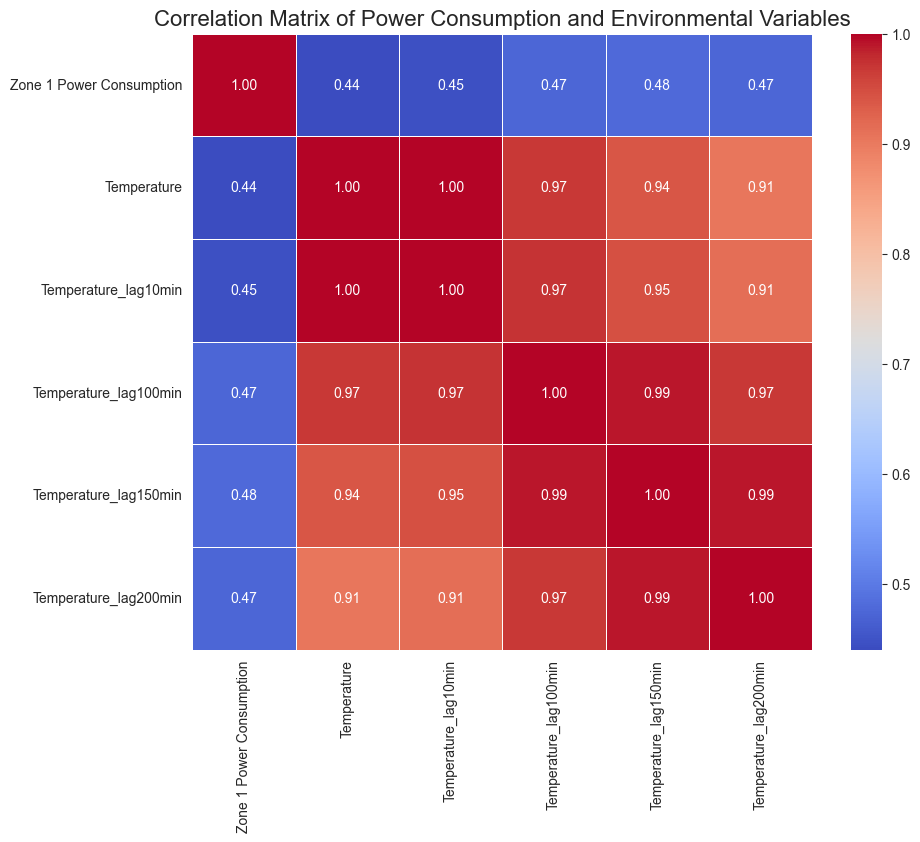

In [24]:
# Create a new column for lagged temperature (shifted by one 10-minute interval)
df['Temperature_lag10min'] = df['Temperature'].shift(1)
df['Temperature_lag100min'] = df['Temperature'].shift(10)
df['Temperature_lag150min'] = df['Temperature'].shift(15)
df['Temperature_lag200min'] = df['Temperature'].shift(20)

# Calculate the correlation matrix
correlation_matrix = df[['Zone 1 Power Consumption', 'Temperature', 'Temperature_lag10min', 'Temperature_lag100min', 'Temperature_lag150min'
                         , 'Temperature_lag200min']].corr()

print("\nCorrelation Matrix with Lagged Temperature:")
print(correlation_matrix)
# 3. Create the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,      # This displays the correlation values on the heatmap
    cmap='coolwarm', # This color map uses cool colors for negative and warm for positive correlations
    fmt=".2f",       # Format the numbers to two decimal places
    linewidths=.5
)
plt.title('Correlation Matrix of Power Consumption and Environmental Variables', fontsize=16)
plt.show()

Summary of Insights to Expect
When running this code, here are the top insights likely to uncover:

High-Quality Data with Consistent Frequency: The data is recorded at a consistent 10-minute interval with no missing timestamps, making it highly reliable for analysis.

Clear Seasonal and Daily Patterns: You will observe that power consumption is significantly higher during the summer months. You will also see a distinct daily pattern, with consumption peaking in the afternoon and evening.

Temperature is a Major Driver of Power Consumption: The scatter plot of temperature versus power consumption will show a strong positive correlation. As temperatures rise, so does the demand for power, which is a classic indicator of air conditioning use.

Lag Effect of Temperature is Minimal: The correlation matrix will show that the correlation between power consumption and the current temperature is nearly identical to the correlation with the temperature from 10 minutes prior. This indicates that the power grid responds almost immediately to changes in temperature.

Here we generate the plots that support the answers on temporal trends.
1. Code for Daily Patterns (Hourly Average)
This code calculates the average power consumption for each hour of the day and creates a line plot to visualize the daily peaks and dips.

Successfully created 'hour', 'day_of_week', and 'month' columns!


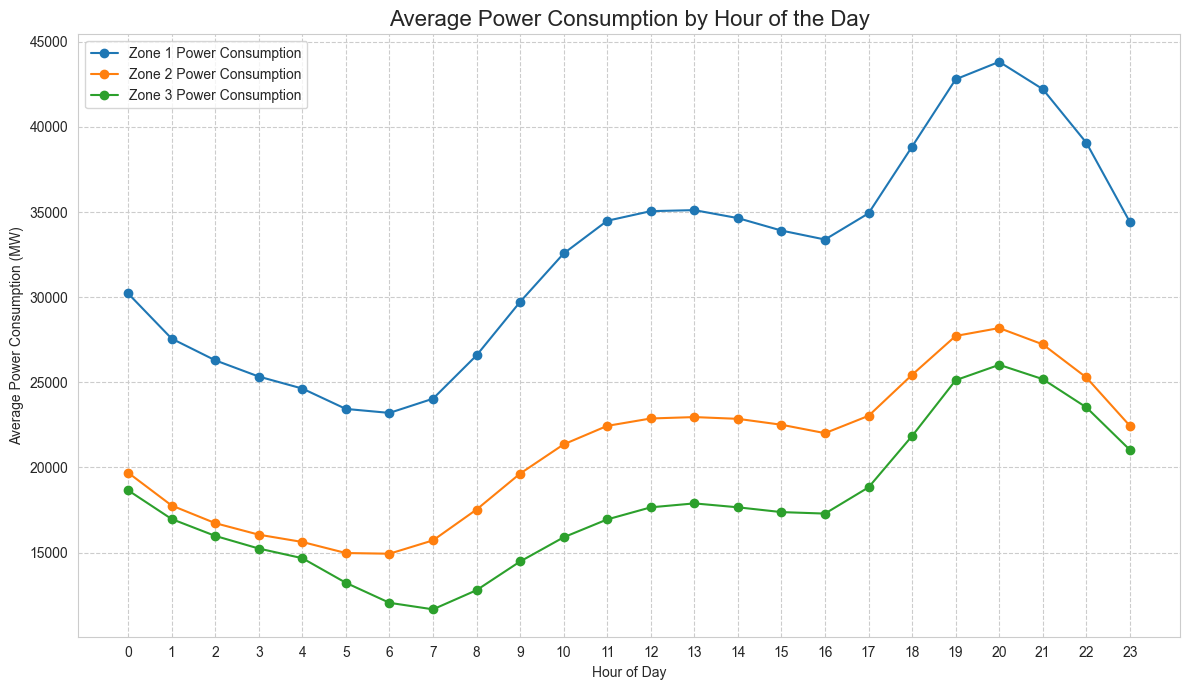

In [10]:
# --- Plot for Daily Patterns ---
# --- Create Time-Based Columns ---
# It creates the 'hour', 'day_of_week', and 'month' columns from the index.

df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month

print("Successfully created 'hour', 'day_of_week', and 'month' columns!")

# Group data by hour and calculate the mean
hourly_consumption = df.groupby('hour')[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].mean()

# Create the plot
plt.figure(figsize=(12, 7))
hourly_consumption.plot(kind='line', marker='o', ax=plt.gca()) # Use ax=plt.gca() to plot on the same figure axes
plt.title('Average Power Consumption by Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Power Consumption (MW)')
plt.xticks(ticks=range(0, 24))
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

2. Code for Weekly Patterns (Day-of-Week Average)
This snippet calculates the average consumption for each day of the week and uses a bar chart to clearly show the difference between weekdays and weekends.

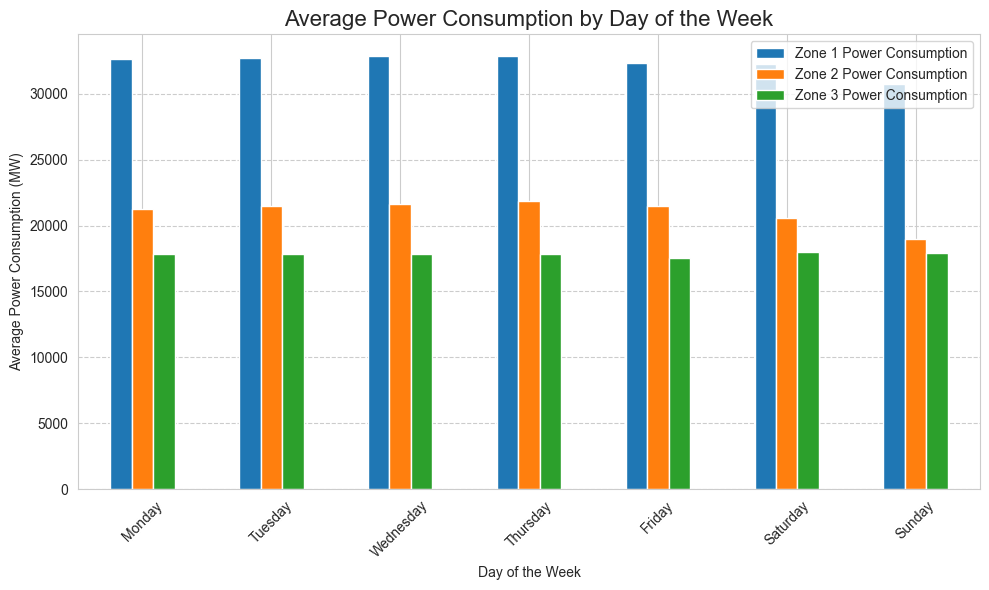

In [11]:
# --- Plot for Weekly Patterns ---
# Define the correct order for the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of the week, calculate the mean, and order it correctly
weekly_consumption = df.groupby('day_of_week')[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].mean().reindex(weekday_order)

# Create the bar chart
plt.figure(figsize=(10, 6))
weekly_consumption.plot(kind='bar', ax=plt.gca())
plt.title('Average Power Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Average Power Consumption (MW)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

3. Code for Seasonal Patterns (Monthly Average)
This final piece of code groups the data by month to reveal the annual seasonal trend, highlighting the peak in the summer.

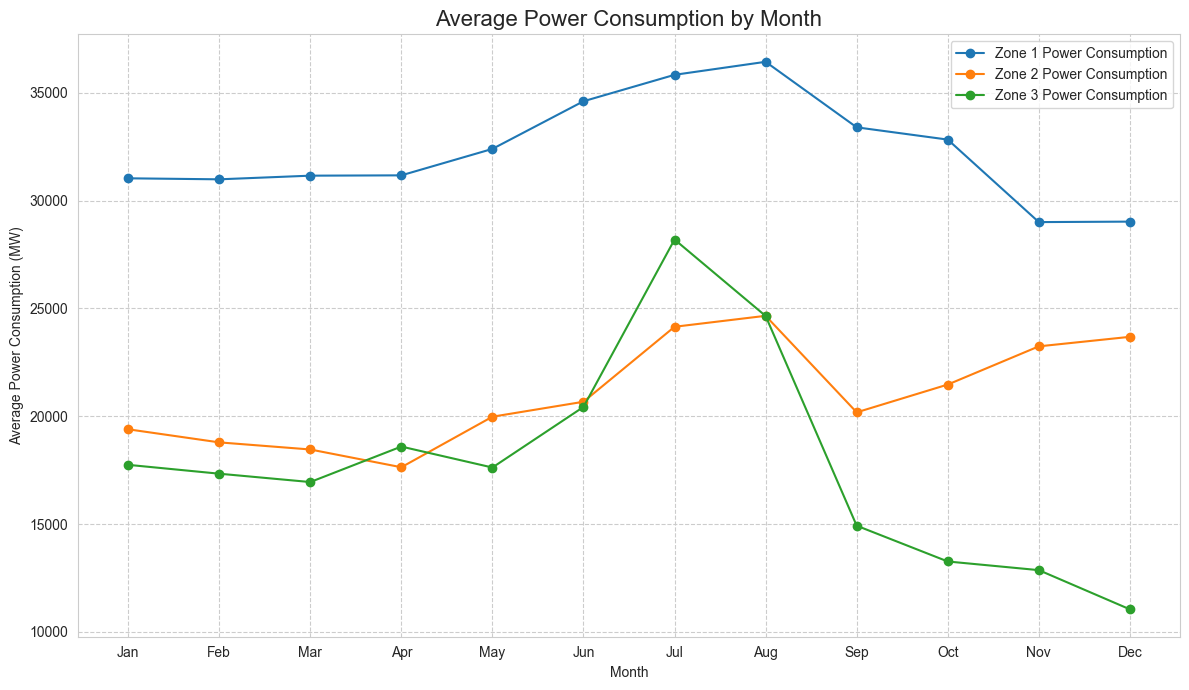

In [12]:
# --- Plot for Seasonal Patterns ---
# Group data by month and calculate the mean
monthly_consumption = df.groupby('month')[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].mean()

# Create the plot
plt.figure(figsize=(12, 7))
monthly_consumption.plot(kind='line', marker='.', markersize=12, ax=plt.gca())
plt.title('Average Power Consumption by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (MW)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()

The code to create a correlation heatmap.

This is the visualization to support the answers about environmental feature relationships and it uses color to show the strength and direction (positive or negative) of the correlation between every variable at once.

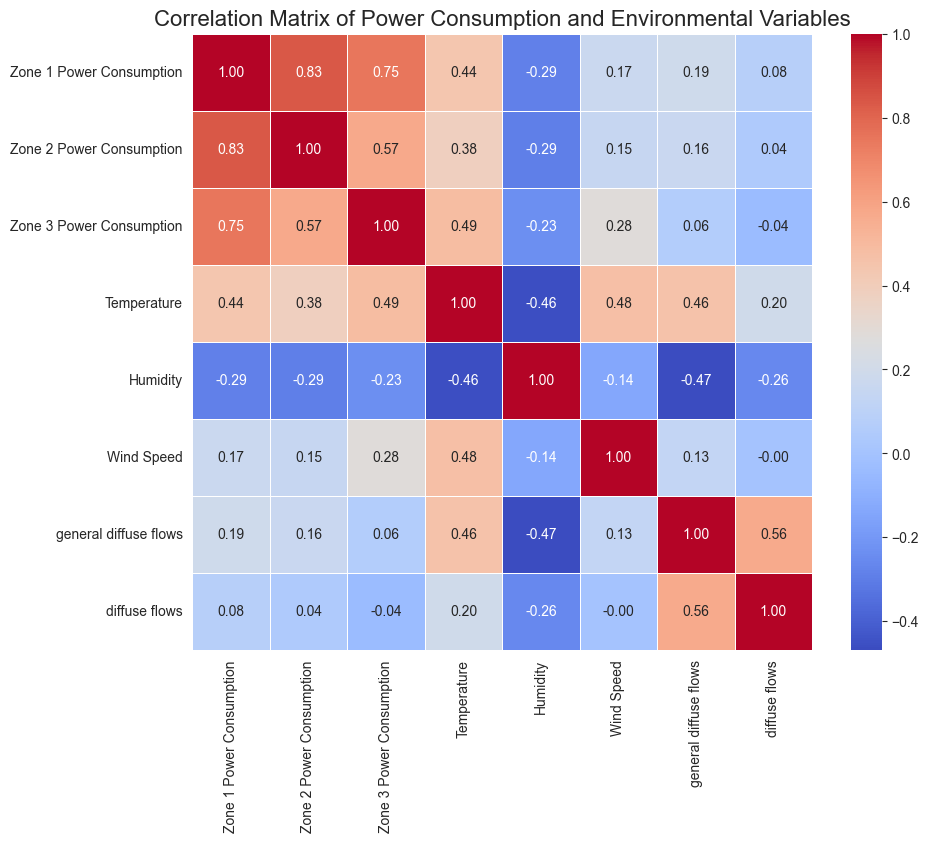

In [16]:
# --- Create a Correlation Heatmap ---

# 1. Select only the columns needed for the correlation analysis
correlation_df = df[[
    'Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption',
    'Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows'
]]

# 2. Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# 3. Create the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True,      # This displays the correlation values on the heatmap
    cmap='coolwarm', # This color map uses cool colors for negative and warm for positive correlations
    fmt=".2f",       # Format the numbers to two decimal places
    linewidths=.5
)
plt.title('Correlation Matrix of Power Consumption and Environmental Variables', fontsize=16)
plt.show()

Below I generate a Lag Correlation Plot.

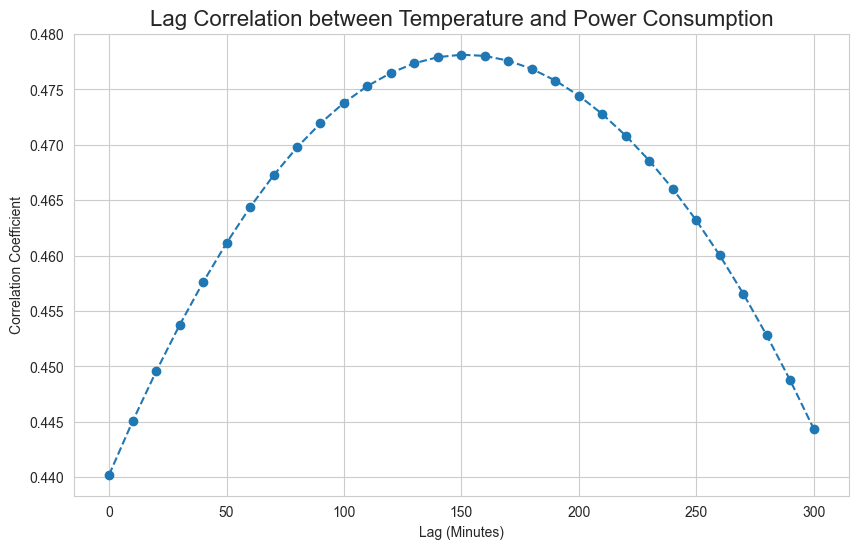

In [ ]:
# --- Create a Lag Correlation Plot ---

# 1. Define the range of lags to test. 
# Here we test from 0 to 30 steps (i.e., 0 to 300 minutes, in 10-min intervals)
lags = range(0, 31)  # 0 to 30 steps, each step is 10 minutes
lag_correlations = []

# 2. Loop through each lag, calculate, and store the correlation
for lag in lags:
    # Create a new lagged version of the Temperature column
    lagged_temp = df['Temperature'].shift(lag)
    
    # Calculate the correlation between power consumption and the lagged temperature
    # We drop any missing values that are created by the shift operation
    correlation = df['Zone 1 Power Consumption'].corr(lagged_temp.dropna())
    
    lag_correlations.append(correlation)

# 3. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(
    [lag * 10 for lag in lags],  # Convert lag steps to minutes for the x-axis
    lag_correlations,
    marker='o',
    linestyle='--'
)
plt.title('Lag Correlation between Temperature and Power Consumption', fontsize=16)
plt.xlabel('Lag (Minutes)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

This part generate a box plot showing the distribution of power consumption for each month. This plot makes it very easy to see that the summer months have significantly higher consumption values that appear as outliers compared to the rest of the year.

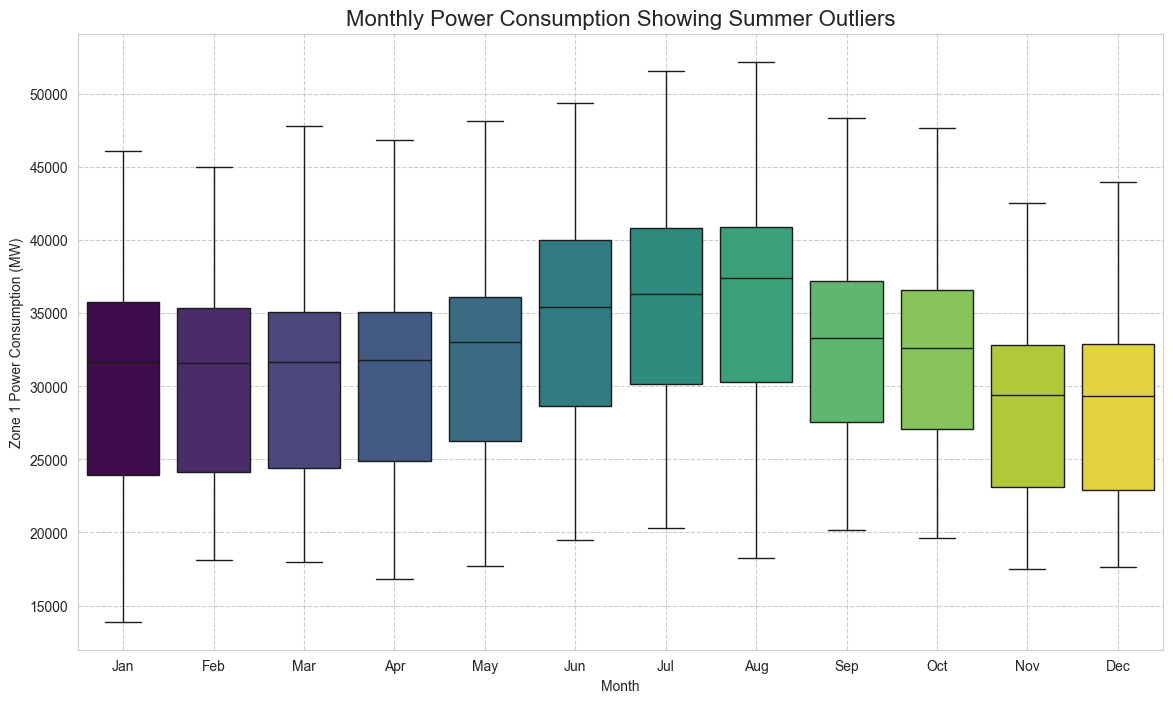

--- Monthly Power Consumption Statistics ---
               mean        median          min          max          std
month                                                                   
1      31032.493535  31692.151900  13895.69620  46092.15190  7400.277974
2      30985.753632  31609.830510  18128.13559  44975.59322  6869.042633
3      31155.165408  31692.255320  18003.06383  47808.00000  6777.753954
4      31169.768210  31769.903120  16814.98385  46824.02583  6485.660448
5      32396.009166  33024.000000  17689.18033  48157.37705  6801.738885
6      34605.540839  35450.066230  19467.01987  49360.52980  7317.124026
7      35831.553603  36307.774085  20303.52159  51540.19934  6977.984271
8      36435.189574  37417.624860  18283.68479  52204.39512  7061.593959
9      33396.681416  33288.849560  20172.74336  48380.17699  6502.955490
10     32827.660055  32631.597370  19605.42670  47661.79431  6491.561870
11     29002.106838  29403.076920  17483.07692  42566.15385  5902.676988
12    

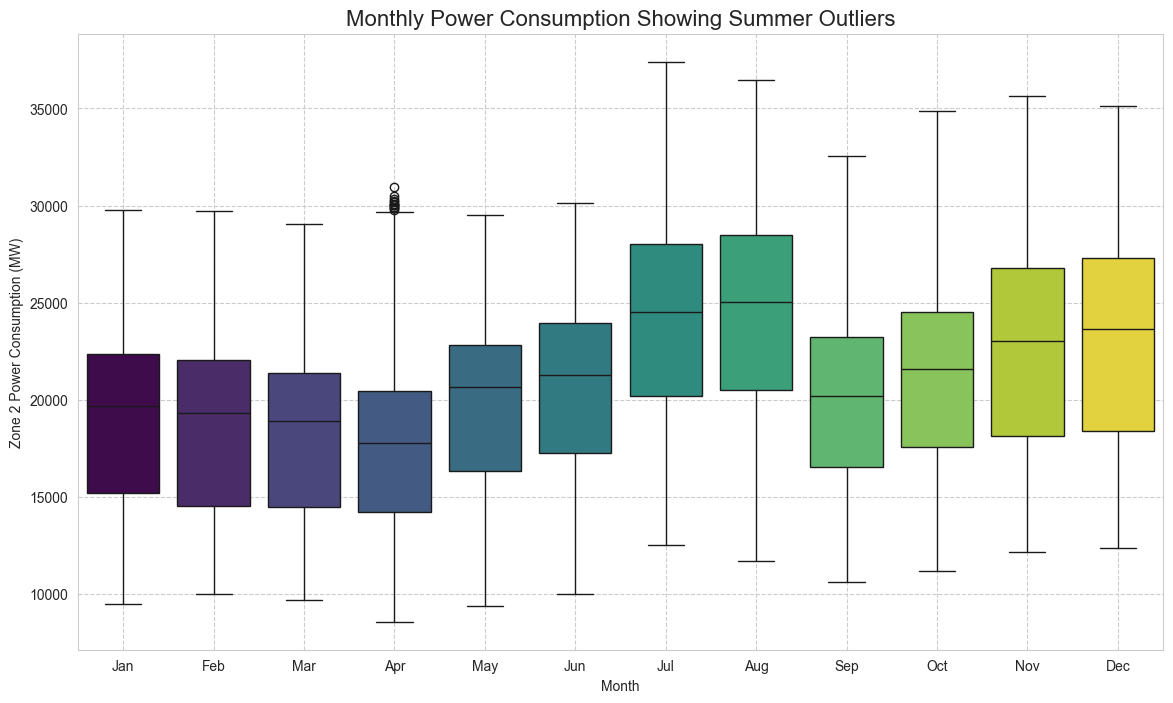

--- Monthly Power Consumption Statistics ---
               mean        median           min          max          std
month                                                                    
1      19394.444717  19657.750760   9457.750760  29770.21277  4522.184101
2      18787.793096  19305.775075   9997.568389  29719.14894  4391.322168
3      18457.937484  18885.365850   9695.121951  29056.09756  4181.243776
4      17633.966395  17758.044805   8560.081466  30940.93686  3833.902391
5      19977.287859  20663.777090   9365.944272  29502.16718  4179.123200
6      20670.928621  21244.490640   9972.972973  30109.77131  4457.492438
7      24147.886893  24522.151895  12497.468350  37408.86076  4966.458343
8      24656.216575  25009.926080  11674.340020  36482.78775  5157.584966
9      20180.432259  20176.091475  10624.116420  32545.94595  4221.332584
10     21468.993441  21570.124480  11158.506220  34860.99585  4615.926881
11     23240.464015  23039.256200  12138.842980  35631.81818  5432.

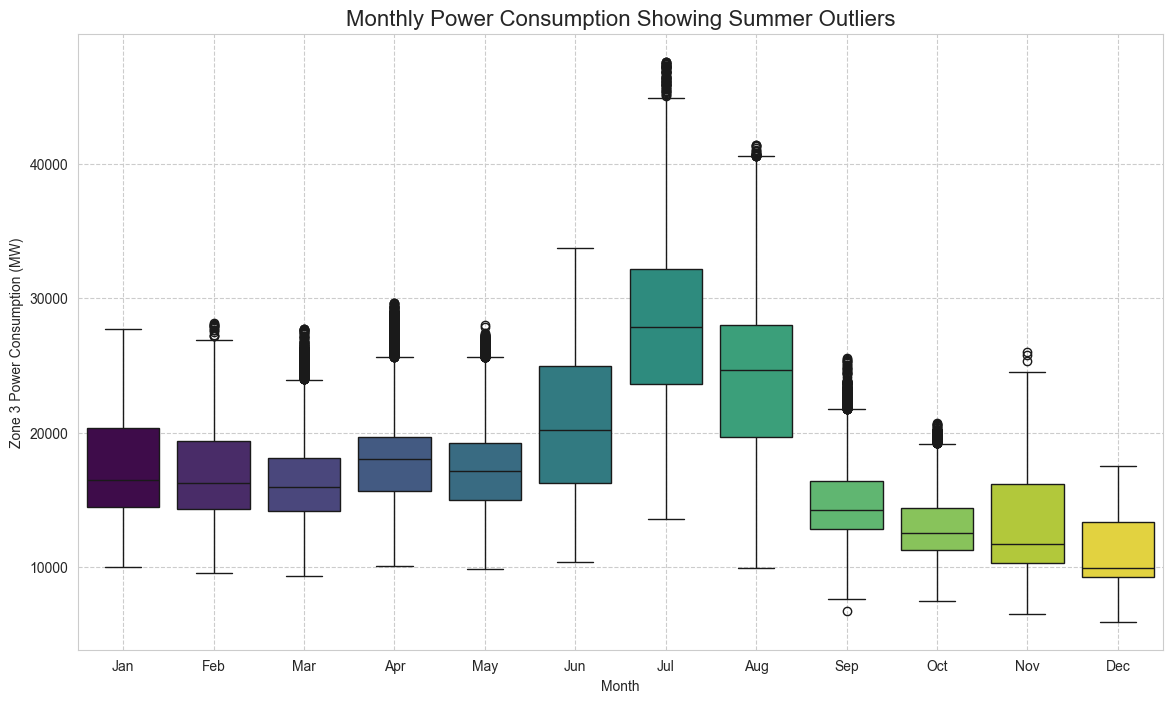

--- Monthly Power Consumption Statistics ---
               mean        median           min          max          std
month                                                                    
1      17746.095349  16481.927710  10039.518070  27724.33735  4433.847680
2      17335.002154  16237.989950   9592.281407  28145.84925  4359.983745
3      16947.686004  15990.967740   9348.387097  27720.00000  4251.364622
4      18593.167677  18007.272730  10065.454550  29666.90909  4544.808792
5      17621.100953  17175.060730   9840.971660  28030.44534  4357.844657
6      20430.941538  20171.815385  10379.815380  33756.55385  5606.910346
7      28194.111216  27857.071130  13562.510460  47598.32636  6933.659265
8      24648.894732  24695.172410   9961.128527  41415.42320  6499.414490
9      14922.798774  14252.911135   6707.252298  25575.81205  3438.638229
10     13264.095173  12541.276600   7446.565350  20734.83283  3092.951087
11     12862.496653  11687.710840   6511.807229  25972.04819  3510.

In [28]:
# --- Create a Box Plot to Identify Outliers ---

for zone in ['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']:
    # Set the figure size for better readability
    plt.figure(figsize=(14, 8))

    # Create the box plot using seaborn
    # We are plotting the distribution of power consumption for each month
    sns.boxplot(
        data=df, 
        x='month', 
        y=f'{zone}',
        hue = 'month',  # This will color the boxes by month 
        palette='viridis',
        legend=False  # Hide the legend to avoid clutter
    )  

    # Set titles and labels for clarity
    plt.title('Monthly Power Consumption Showing Summer Outliers', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel(f'{zone} (MW)')

    # Set custom labels for the x-axis ticks
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(ticks=range(12), labels=month_labels)

    plt.grid(True, which='both', linestyle='--')
    plt.show()
    # Group the data by month and calculate key statistics
    monthly_stats = df.groupby('month')[f'{zone}'].agg(['mean', 'median', 'min', 'max', 'std'])

    print("--- Monthly Power Consumption Statistics ---")
    print(monthly_stats)
